In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io, scipy.ndimage
import seaborn as sns
import pandas as pd

In [2]:
# load data from files
DIR = '../src/'

data_a = np.loadtxt(DIR+'NonNeutralSummary_a.txt', dtype=int)
data_b = np.loadtxt(DIR+'NonNeutralSummary_b.txt', dtype=int)

# create pandas dataframe... this part is a hack that might get removed
# if I already save output from the C++ code in the correct format

## create vector that contains the simulation run index
simulation_run = np.repeat(np.arange(0,data_a.shape[0],1),
          data_a.shape[1])

## create vector containing cell number
cell_index = np.tile(np.arange(0, data_a.shape[1],1), data_a.shape[0])

## create vector containing type name
types = np.repeat(np.array(['a', 'b']), data_a.flatten().size)

## create dataframe
data = pd.DataFrame({"cell index": np.concatenate((cell_index, cell_index)),
                    "simulation run": np.concatenate((simulation_run, simulation_run)),
                     "copy number": np.concatenate((data_a.flatten(), data_b.flatten())),
                     "ecDNA type": types})
data

,cell index,simulation run,copy number,ecDNA type
0,0,0,10,a
1,1,0,14,a
2,2,0,18,a
3,3,0,19,a
4,4,0,38,a
...,...,...,...,...
3999995,99995,19,52,b
3999996,99996,19,28,b
3999997,99997,19,51,b
3999998,99998,19,0,b


Text(0.5, 1.0, 'Total ecDNA copy number')

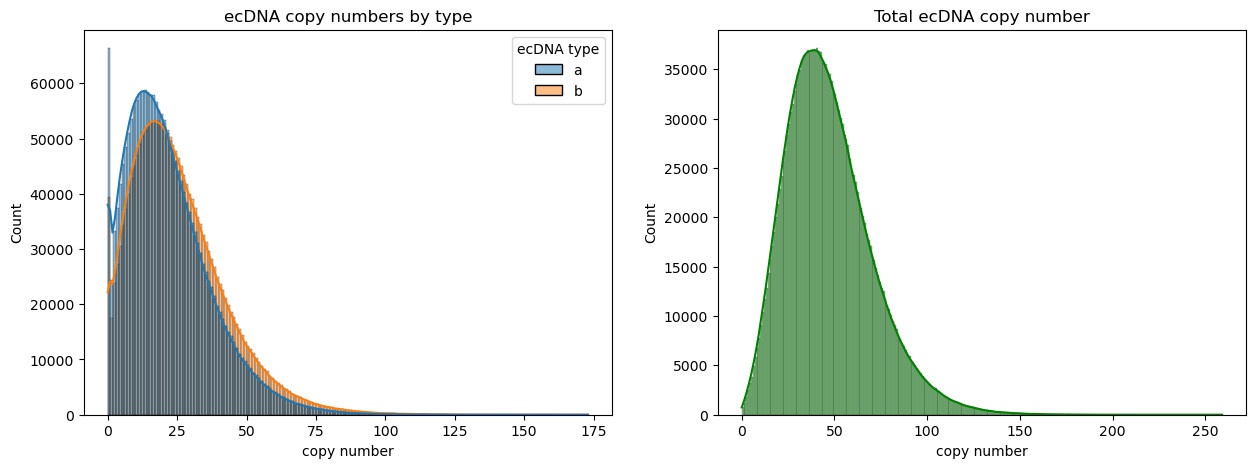

In [3]:
# plot histograms
max_no = int(max(data_a.max(), data_b.max()))
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=data, bins=max_no, x="copy number", hue="ecDNA type", kde=True)
plt.title('ecDNA copy numbers by type')

# groupby simulation run and cell index and plot the histogram of total
# ecDNA copy number
group = data.groupby(['cell index','simulation run'])['copy number']
plt.subplot(122)
sns.histplot(group.sum(), bins=group.sum().max(), kde=True, color='g')
plt.title('Total ecDNA copy number')